In [ ]:
!pip install -q datasets
!pip install -q open_clip_torch
!pip install -q torch
!pip install -q transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 469.0/469.0 KB 22.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 212.2/212.2 KB 26.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 66.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199.2/199.2 KB 21.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 132.9/132.9 KB 19.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.5/110.5 KB 14.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import open_clip
import torch
import transformers
from sklearn import metrics
from datasets import load_dataset
import scipy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = load_dataset('poloclub/diffusiondb', '2m_first_10k')
df = dataset['train'].to_pandas()
df.drop_duplicates(subset=['prompt'], inplace=True)
df['image'] = df['image'].apply(lambda x: x['path'])

df = df.sample(n=2000, random_state=42).reset_index(drop=True)

df.reset_index(inplace=True, drop=True)

df.head(2)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset diffusiondb downloaded and prepared to /root/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_10k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

image  \
0  /root/.cache/huggingface/datasets/downloads/ex...   
1  /root/.cache/huggingface/datasets/downloads/ex...   

                                              prompt        seed  step   cfg  \
0  classic oil painting, sci fi beautiful landsca...  3578732311    50  12.0   
1  3 panel scene, anime girl sleeps inside a cozy...  1787203390    50   5.0   

  sampler  width  height                                          user_name  \
0   k_lms   1280     512  26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...   
1   k_lms    512    1024  56b9f823a65b1259d7a469d0e0726722e6f87297384c8f...   

                  timestamp  image_nsfw  prompt_nsfw  
0 2022-08-18 20:28:00+00:00    0.059204     0.000319  
1 2022-08-20 02:43:00+00:00    0.183237     0.000596

In [ ]:
df.shape

(2000, 12)

In [ ]:
labels = pd.read_csv('labels.csv')
df = df.merge(labels, on='prompt', how='inner')
df.head(1)

image  \
0  /root/.cache/huggingface/datasets/downloads/ex...   

                                              prompt        seed  step   cfg  \
0  classic oil painting, sci fi beautiful landsca...  3578732311    50  12.0   

  sampler  width  height                                          user_name  \
0   k_lms   1280     512  26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...   

                  timestamp  ...  \
0 2022-08-18 20:28:00+00:00  ...   

                                        phrase_1            phrase_2  \
0  a man standing on a rock in a mountain valley  8 k matte painting   

            phrase_3                phrase_4            phrase_5  \
0  8k matte painting  matte fantasy painting  4 k matte painting   

                     phrase_6                     phrase_7  \
0  luminescent matte painting  high fantasy matte painting   

                                         first_seven cs_prompt_open  \
0  a man standing on rock in mountain valley 8 k ...       0.392391   

  cs_prompt_seven  
0        0.330291  

[1 rows x 24 columns]

In [ ]:
labels.head(1)

prompt  \
0  classic oil painting, sci fi beautiful landsca...   

                                           open_clip  \
0  a painting of a mountain range with a body of ...   

                                          clip_inter  \
0  ['a man standing on a rock in a mountain valle...   

                                        phrase_1            phrase_2  \
0  a man standing on a rock in a mountain valley  8 k matte painting   

            phrase_3                phrase_4            phrase_5  \
0  8k matte painting  matte fantasy painting  4 k matte painting   

                     phrase_6                     phrase_7  \
0  luminescent matte painting  high fantasy matte painting   

                                         first_seven  cs_prompt_open  \
0  a man standing on rock in mountain valley 8 k ...        0.392391   

   cs_prompt_seven  
0         0.330291

## Column Explanations

| column | meaning |
| --- | --- |
| open_clip | open clip response |
| clip_inter | clip interrogator full response, list format |
| phrase_1 | first phrase from clip interrogator |
| phrase_2 | second phrase from clip interrogator |
| phrase_3 | third phrase from clip interrogator |
| phrase_4 | fourth phrase from clip interrogator |
| phrase_5 | fifth phrase from clip interrogator |
| phrase_6 | sixth phrase from clip interrogator |
| phrase_7 | seventh phrase from clip interrogator |
|first_seven | all 7 phrase concatenated as a string, dropped duplicate words |
| cs_prompt_open | cosine similarity of original prompt and open clip response |
| cs_prompt_seven | cosine similarity of prompt and "first_seven" of clip interrogator|



## Test Train Split

In [ ]:
train = df.iloc[0:1500]
test = df.iloc[1500:2000]

train.shape, test.shape

((1500, 24), (500, 24))

In [ ]:
train.head(1)

image  \
0  /root/.cache/huggingface/datasets/downloads/ex...   

                                              prompt        seed  step   cfg  \
0  classic oil painting, sci fi beautiful landsca...  3578732311    50  12.0   

  sampler  width  height                                          user_name  \
0   k_lms   1280     512  26da12cd3526e1b10319bb5d94ea516909c1cb4a5b77da...   

                  timestamp  ...  \
0 2022-08-18 20:28:00+00:00  ...   

                                        phrase_1            phrase_2  \
0  a man standing on a rock in a mountain valley  8 k matte painting   

            phrase_3                phrase_4            phrase_5  \
0  8k matte painting  matte fantasy painting  4 k matte painting   

                     phrase_6                     phrase_7  \
0  luminescent matte painting  high fantasy matte painting   

                                         first_seven cs_prompt_open  \
0  a man standing on rock in mountain valley 8 k ...       0.392391   

  cs_prompt_seven  
0        0.330291  

[1 rows x 24 columns]

In [ ]:
test.head(1)

image  \
1500  /root/.cache/huggingface/datasets/downloads/ex...   

                                                 prompt        seed  step  \
1500  lemonbrat studios bat fursuit, fursuiter, cand...  1758474385    50   

       cfg sampler  width  height  \
1500  10.0   k_lms    512     640   

                                              user_name  \
1500  eaa41f839ff05c773bb8a0907424edbfeedf3ae4ccce84...   

                     timestamp  ...                                  phrase_1  \
1500 2022-08-16 19:17:00+00:00  ...  a person in a costume with a cat mask on   

      phrase_2     phrase_3                  phrase_4  \
1500   fursuit  fursuit!!!!  furry character portrait   

                            phrase_5         phrase_6     phrase_7  \
1500  headshot of young female furry  furry character  macro furry   

                                            first_seven cs_prompt_open  \
1500  a person in costume with cat mask on fursuit f...       0.228366   

     cs_prompt_seven  
1500        0.474969  

[1 rows x 24 columns]

[ full - body portrait of a man ]! with a disdain, exacerbated facial expression, wearing a [ white robe ]!, trending on [ artstation ]!, digital art, cgsociety contest winner, [ symmetrical ]!, golden ratio!, award winning, bioluminescent colors, volumetric lighting, afrofuturism 


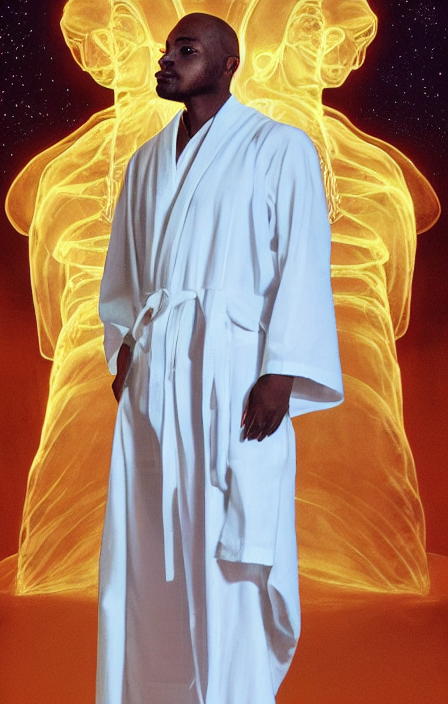

In [ ]:
nums = np.random.randint(0, 1500, 1)

for i in nums :
    img = Image.open(train['image'][i])
    prompt = train['prompt'][i]
    print(prompt)
    display(img)

## Yolo

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)

model = torch.hub.load('ultralytics/yolov5', 'yolov5l', force_reload=True)  # yolov5n - yolov5x6 or custom
#im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list  # or .show(), .save(), .crop(), .pandas(), etc.

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython>=3.1.30" "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184.3/184.3 KB 11.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 56.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.7/62.7 KB 8.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3

requirements: 2 packages updated per 

  0%|          | 0.00/89.3M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


1


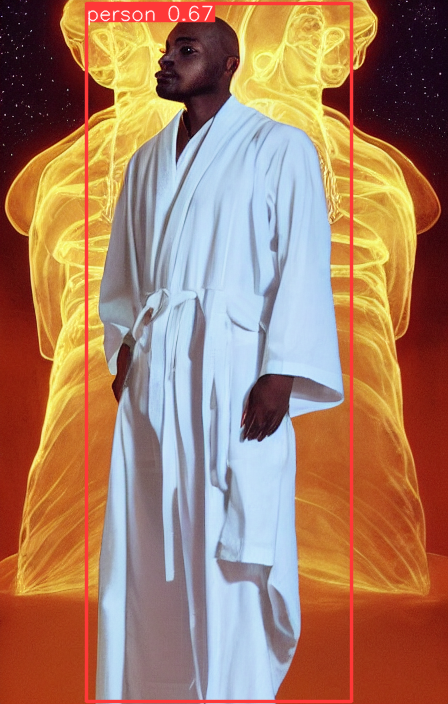

In [ ]:
results = model(img)  # inference
print(len(results.pandas().xyxy[0]))
results.show()

## Open Clip

In [ ]:
open_model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [ ]:
count = 0
cropped = 0
results_df = pd.DataFrame(columns=['prompt', 'quad_1', 'quad_2', 'quad_3', 'quad_4', 'yolo'])

for index, row in test.iterrows() :

    image = Image.open(row['image'])
    prompt = row['prompt']

    results = model(image) 

    # split image into 4 quadrants
    width, height = image.size
    left = 0
    top = 0
    right = width / 2
    bottom = height / 2

    # crop image
    image1 = image.crop((left, top, right, bottom))
    image2 = image.crop((right, top, width, bottom))
    image3 = image.crop((left, bottom, right, height))
    image4 = image.crop((right, bottom, width, height))
    cropped += 1

    prompts = []
    for picture in [image1, image2, image3, image4] :

      im = picture.convert("RGB")
      im = transform(im).unsqueeze(0)

      with torch.no_grad(), torch.cuda.amp.autocast():
        generated = open_model.generate(im)

      clip = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "")
      prompts.append(clip)

    results_df = results_df.append({'prompt': prompt, 'quad_1': prompts[0], \
                  'quad_2': prompts[1], 'quad_3': prompts[2], 'quad_4': prompts[3], \
                  'yolo': len(results.pandas().xyxy[0])}, ignore_index=True) 
      


    count += 1
    if count % 10 == 0 :
      print(count)
      print(cropped)

10
10
20
20
30
30
40
40
50
50
60
60
70
70
80
80
90
90
100
100
110
110
120
120
130
130
140
140
150
150
160
160
170
170
180
180
190
190
200
200
210
210
220
220
230
230
240
240
250
250
260
260
270
270
280
280
290
290
300
300
310
310
320
320
330
330
340
340
350
350
360
360
370
370
380
380
390
390
400
400
410
410
420
420
430
430
440
440
450
450
460
460
470
470
480
480
490
490
500
500


In [ ]:
results_df

prompt  \
0    lemonbrat studios bat fursuit, fursuiter, cand...   
1    a raspberry made of metal, reflective, unreal ...   
2    üêâüåä digital artwork by vincent bons, michael wh...   
3    bridge to the light, beautiful landscape, envi...   
4    graffiti explosion, multicolor color scheme, b...   
..                                                 ...   
495  a small ocean full of life, studio lighting, g...   
496                           an sem photo of a corgi    
497  photo cartoon illustration painting of small s...   
498  a beautiful close - up of of a blond german ma...   
499  a hedgehog in a canoe on water, professional p...   

                                                quad_1 quad_2  \
0      a close - up view of a yellow and black bird .     NaN   
1         a close up of some raspberries on a table .     NaN   
2       an abstract painting of a boat in the water .     NaN   
3       a person sitting on top of a boat on a pier .     NaN   
4    an abstract painting of a bunch of different t...    NaN   
..                                                 ...    ...   
495              the sun is shining on a cloudy sky .     NaN   
496  an orange and white cat is looking up at the s...    NaN   
497           a painting of a room with neon lights .     NaN   
498  a close - up view of the face of a woman with ...    NaN   
499  a close - up view of a brush on the side of th...    NaN   

                                                quad_3  \
0    a close up of a stuffed animal wearing a costu...   
1        a close - up of two raspberries on a table .    
2        an oil painting of a sailboat in the ocean .    
3    an artistic painting of a tree trunk in the mi...   
4                an oil painting of a pile of trash .    
..                                                 ...   
495  a person standing in the water next to the oce...   
496  a close - up of the face of a dog with its mou...   
497  an artistic painting of a city street filled w...   
498    a close - up view of a man 's torso and arms .    
499    a paddle boat on the water with a red paddle .    

                                                quad_4 yolo  \
0      a close - up view of a purple and yellow wig .     1   
1        a person holding onto a balloon in the sky .     0   
2                   a painting of a boat in the water     0   
3    an artistic painting of a bridge over a body o...    0   
4                an oil painting of a pile of trash .     0   
..                                                 ...  ...   
495         a large body of water that is very dark .     1   
496         a close - up of the face of a corgi dog .     2   
497    a painting of a room with a lot of furniture .     1   
498              a close - up view of a man 's lips .     1   
499               a close up of a porcupine in a boat     1   

                                             quad_2_oc  
0    a close - up view of a purple and yellow flowe...  
1              a close up of a raspberry on a table .   
2                an image of a woman in a green dress   
3                the sun is setting on a cloudy day .   
4    an abstract painting of a sky filled with lots...  
..                                                 ...  
495  the sun is shining on the surface of the water .   
496  an orange and white cat is looking at the came...  
497   an abstract painting of a building and stairs .   
498              a close - up view of a man 's eyes .   
499          a close - up of the head of a hedgehog .   

[500 rows x 7 columns]

In [ ]:
results_df.rename(columns={'quad_2_oc': 'quad_2'}).to_csv('open_yolo.csv', index=False)

In [ ]:
results_df.to_csv('open_yolo.csv', index=False)